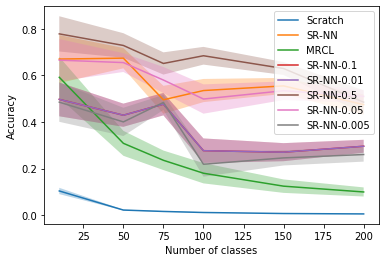

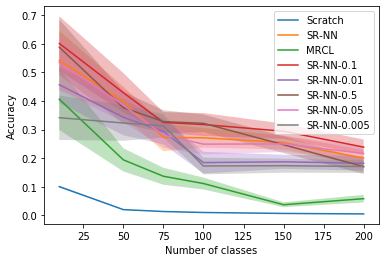

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json 

def get_mean_and_std(filename, points):
    mean = []
    std = []
    for point in points:
        with open(f"{filename}_{point}.json", 'r') as f:
            results = json.load(f)
        mean.append(np.mean(np.array(results).astype(np.float)))  
        std.append(np.std(np.array(results).astype(np.float))) 
    mean = np.array(mean)
    std = np.array(std)
    return mean, std


def plot_evaluation_results(methods):
    for name, path in methods.items():
        scartch_train, scartch_train_std = get_mean_and_std(path, points)
        plt.plot(points, scartch_train, label=name)
        plt.fill_between(points, scartch_train-scartch_train_std, scartch_train+scartch_train_std, alpha = 0.3)
    plt.xlabel("Number of classes")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

points = [10, 50, 75, 100, 150, 200]

methods_train = {"Scratch": "results/omniglot/scratch/mrcl_omniglot_training",
                 "SR-NN": "results/omniglot/sr_nn/sr_nn_eval_train",
                 #"SR-NN-ALL": "results/omniglot/sr_nn/sr_nn_eval_train_all",
                 "MRCL": "results/omniglot/mrcl/mrcl_omniglot_training",
                 "SR-NN-0.1": "results/omniglot/sr_nn/beta_search/sr_nn_eval_train_0_01",
                 "SR-NN-0.01": "results/omniglot/sr_nn/beta_search/sr_nn_eval_train_0_01",
                 "SR-NN-0.5": "results/omniglot/sr_nn/beta_search/sr_nn_eval_train_0_5",
                 "SR-NN-0.05": "results/omniglot/sr_nn/beta_search/sr_nn_eval_train_0_05",
                 "SR-NN-0.005": "results/omniglot/sr_nn/beta_search/sr_nn_eval_train_0_005"}

methods_test = {"Scratch": "results/omniglot/scratch/mrcl_omniglot_testing",
                "SR-NN": "results/omniglot/sr_nn/sr_nn_eval_test",
                #"SR-NN-ALL": "results/omniglot/sr_nn/sr_nn_eval_test_all",
                "MRCL": "results/omniglot/mrcl/mrcl_omniglot_testing",
                "SR-NN-0.1": "results/omniglot/sr_nn/beta_search/sr_nn_eval_test_0_1",
                "SR-NN-0.01": "results/omniglot/sr_nn/beta_search/sr_nn_eval_test_0_01",
                "SR-NN-0.5": "results/omniglot/sr_nn/beta_search/sr_nn_eval_test_0_5",
                "SR-NN-0.05": "results/omniglot/sr_nn/beta_search/sr_nn_eval_test_0_05",
                "SR-NN-0.005": "results/omniglot/sr_nn/beta_search/sr_nn_eval_test_0_005"}

plot_evaluation_results(methods_train)
plot_evaluation_results(methods_test)